In [1]:
from PIL import Image, ImageFilter
import numpy as np

In [2]:
def display_img(X, scale = 20):
    if X.min() < 0:
        X = X + abs( X.min())
        X = X * (1 / X.max())
        
    if isinstance(X, np.ndarray):
        X = Image.fromarray((X* 254).astype("uint8"))
        
    X = X.resize((X.width * scale, X.height * scale), Image.NEAREST)
    return X

In [20]:
img = Image.open("heart.png")
img.show()

In [6]:
img = img.convert('L')
X = 1/255 * np.array(img).astype(dtype= float)

print(X, X.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] (14, 15)


In [8]:
def convolve_3x3(X, kernel):
    filtered_img = np.zeros(X.shape)
    for i in range(1,X.shape[0] - 1):
        for j in range(1,X.shape[1] - 1):
            val = 0
 
            val = val + X[i-1][j-1] * kernel[0][0]
            val = val + X[i-1][j-0] * kernel[0][1]
            val = val + X[i-1][j+1] * kernel[0][2]

            val = val + X[i-0][j-1] * kernel[1][0]
            val = val + X[i-0][j-0] * kernel[1][1]
            val = val + X[i-0][j+1] * kernel[1][2]
               
            val = val + X[i+1][j-1] * kernel[2][0]
            val = val + X[i+1][j-0] * kernel[2][1]
            val = val + X[i+1][j+1] * kernel[2][2]

            filtered_img[i][j] = val
    return filtered_img

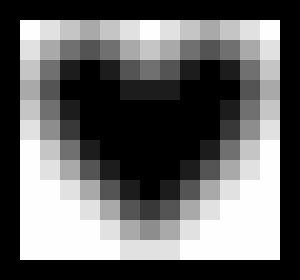

In [13]:
box_blur = np.array([[1/9,  1/9,  1/9],
                     [1/9,  1/9,  1/9],
                     [1/9,  1/9,  1/9]])

filtered_img_2 = convolve_3x3(X, box_blur)

display_img(filtered_img_2)

-3.0


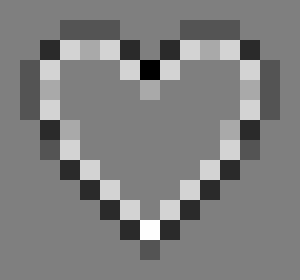

In [14]:
edge = np.array([[0,   1,  0],
                 [1,  -4,  1],
                 [0,   1,  0]])

filtered_img = convolve_3x3(X, edge)
print(filtered_img.min())
display_img(filtered_img)

In [15]:
sobel_v = np.array([[ 1,  0,  -1],
                    [ 2,  0,  -2],
                    [ 1,  0,  -1]])

sobel_h = np.array([[ 1,  2,   1],
                    [ 0,  0,   0],
                    [-1, -2,  -1]])

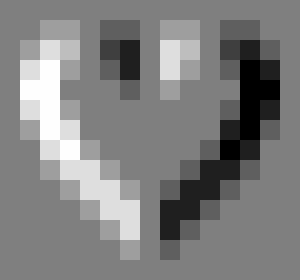

In [16]:
filtered_img_3 = convolve_3x3(X, sobel_v) 

display_img(filtered_img_3)


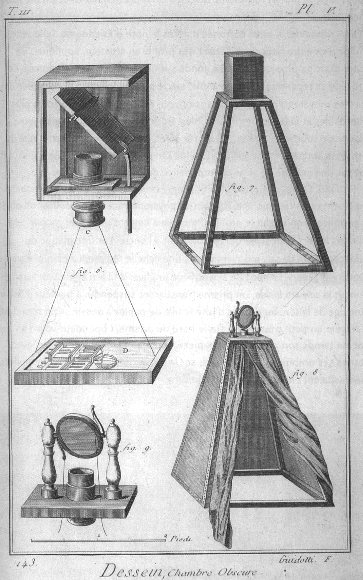

In [17]:
Image.open("camera_obscura.jpg")

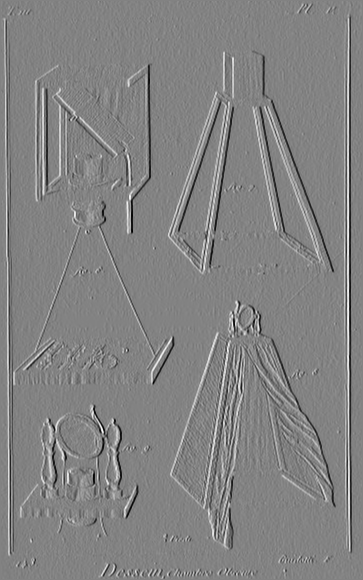

In [18]:
img = Image.open("camera_obscura.jpg")
img = img.convert('L')
X = 1/255 * np.array(img).astype(dtype= float)

filtered_img = convolve_3x3(X, sobel_v)

display_img(filtered_img,1)

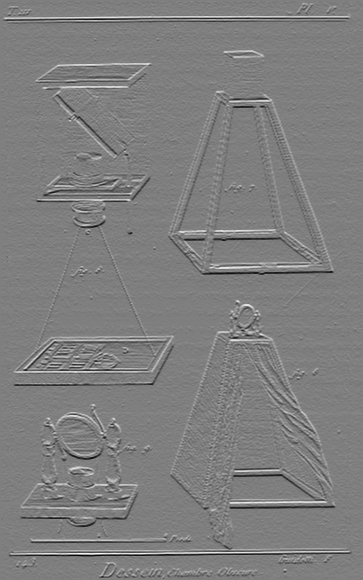

In [19]:
filtered_img = convolve_3x3(X, sobel_h)
display_img(filtered_img,1)